<a href="https://colab.research.google.com/github/mayraberrones94/FCFM/blob/master/Semana_1_Pre_procesamiento_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semana 1: Pre procesamiento de texto.

En este ejercicio revisaremos los pasos claves para analizar texto. Aprenderan a utilizar texto de diferentes fuentes de internet, hacer un analisis preliminar, y generar resultados y discusiones relevantes.

En este caso estaremos usando librerías de python para poder jalar la información. En este caso, la librería `request` nos sirve para poder llamar paginas HTML de internet, y el paquete `NLTK` nos sirve para analizar el texto.

In [ ]:
import requests 
print (requests.get('http://google.com').text)

<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="nl"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>Google</title><script nonce="YMFmlvo7QRjsO0qEX-vAng">(function(){window.google={kEI:'QGF9Ytb-Mo37kwXZgb-wDg',kEXPI:'0,1302536,56873,6058,207,4804,2316,383,246,5,1354,4013,1237,1122516,1578491,16114,28684,17572,4859,1361,12314,17585,4998,13228,3847,10622,22741,5968,706,1279,2743,148,1103,842,1981,4314,108,3406,606,2023,1777,520,14670,3227,1989,856,8,17449,16320,4465,13142,3,576,6608,12314,1661,4,1528,2304,32112,2658,7357,13658,4437,16786,5818,2539,4094,4052,3,3541,1,42154,2,14022,1931,12185,11623,5679,3401,28741,4569,6258,20800,2618,1252,5835,14968,4332,6090,1394,11239,15406,1,436,8155,6582,799,14680,431,6910,3217,11240,1927,542,1336,1398,1342,123,1388,77,417,2557,599,23,879,6774,102,688,2472,1477,2421,677,3,208,490,4,2912,2,1722,6856,1

## Proyecto gutenberg

Como primera fuente podemos explorar la libreria del proyecto gutenberg, el cual es una pagina web en donde puedes descargar libros de manera gratuita. Esto nos puede servir para poder trabajar con una gran cantidad de texto y procesarlo.

Para poder descargar un libro de esta pagina, tienes que usar tu buscador de preferencia el link del libro que te gustaria analizar (https://www.gutenberg.org/). Una vez que elijas el libro, copia el link de la version `Plain text UTF-8`.

In [ ]:
import requests
from bs4 import BeautifulSoup
import nltk
from nltk.stem import WordNetLemmatizer 
import codecs

In [ ]:
austen = codecs.open("/content/drive/MyDrive/Datasets/1342-h.htm", 'r', 'utf-8')
print('Done!')

Done!



Por lo general al descargar libros de esta libreria nos vamos a encontrar con texto adicional que podemos eliminar mas adelante, como tablas de contenido o el disclaimer al final del texto. Es importante saber tambien que esta libreria tiene un limite de descarga de unos cuantos libros cada 24 hrs. Si el problema que quieres resolver involucra mas de 10 libros, es recomendable descargarlos y tenerlos guardados en tu carpeta personal.

In [ ]:
soup = BeautifulSoup(austen)

text = soup.get_text()
print(text[32000:34000])

ey had several children. The eldest of them, a
      sensible, intelligent young woman, about twenty-seven, was Elizabeth’s
      intimate friend.
    

      That the Miss Lucases and the Miss Bennets should meet to talk over a ball
      was absolutely necessary; and the morning after the assembly brought the
      former to Longbourn to hear and to communicate.
    

      “You began the evening well, Charlotte,” said Mrs. Bennet with
      civil self-command to Miss Lucas. “You were Mr. Bingley’s first
      choice.”
     

      “Yes; but he seemed to like his second better.”
     

      “Oh! you mean Jane, I suppose, because he danced with her twice. To be
      sure that did seem as if he admired her—indeed I rather
      believe he did—I heard something about it—but I hardly
      know what—something about Mr. Robinson.”
     

      “Perhaps you mean what I overheard between him and Mr. Robinson; did not I
      mention it to you? Mr. Robinson’s asking him how he liked our Me

In [ ]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

tokens = tokenizer.tokenize(text)

print(tokens[:100])

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Pride', 'and', 'Prejudice', 'by', 'Jane', 'Austen', 'body', 'margin', 'left', '20', 'margin', 'right', '20', 'text', 'align', 'justify', 'h1', 'h2', 'text', 'align', 'center', 'font', 'style', 'normal', 'font', 'weight', 'normal', 'line', 'height', '1', '5', 'margin', 'top', '5em', 'margin', 'bottom', '5em', 'h1', 'font', 'size', '300', 'margin', 'top', '0', '6em', 'margin', 'bottom', '0', '6em', 'letter', 'spacing', '0', '12em', 'word', 'spacing', '0', '2em', 'text', 'indent', '0em', 'h2', 'font', 'size', '150', 'margin', 'top', '2em', 'margin', 'bottom', '1em', 'no', 'break', 'page', 'break', 'before', 'avoid', 'for', 'epubs', 'div', 'chapter', 'page', 'break', 'before', 'always', 'margin', 'top', '4em', 'hr', 'width', '80', 'margin', 'top', '2em', 'margin', 'bottom']


In [ ]:
words = [word.lower() for word in tokens]

print(words[:100])

['the', 'project', 'gutenberg', 'ebook', 'of', 'pride', 'and', 'prejudice', 'by', 'jane', 'austen', 'body', 'margin', 'left', '20', 'margin', 'right', '20', 'text', 'align', 'justify', 'h1', 'h2', 'text', 'align', 'center', 'font', 'style', 'normal', 'font', 'weight', 'normal', 'line', 'height', '1', '5', 'margin', 'top', '5em', 'margin', 'bottom', '5em', 'h1', 'font', 'size', '300', 'margin', 'top', '0', '6em', 'margin', 'bottom', '0', '6em', 'letter', 'spacing', '0', '12em', 'word', 'spacing', '0', '2em', 'text', 'indent', '0em', 'h2', 'font', 'size', '150', 'margin', 'top', '2em', 'margin', 'bottom', '1em', 'no', 'break', 'page', 'break', 'before', 'avoid', 'for', 'epubs', 'div', 'chapter', 'page', 'break', 'before', 'always', 'margin', 'top', '4em', 'hr', 'width', '80', 'margin', 'top', '2em', 'margin', 'bottom']


In [ ]:
sw = nltk.corpus.stopwords.words('english')

print(sw[:100])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once']


In [ ]:
words_ns = [word for word in words if word not in sw]

print(words_ns[:100])

['project', 'gutenberg', 'ebook', 'pride', 'prejudice', 'jane', 'austen', 'body', 'margin', 'left', '20', 'margin', 'right', '20', 'text', 'align', 'justify', 'h1', 'h2', 'text', 'align', 'center', 'font', 'style', 'normal', 'font', 'weight', 'normal', 'line', 'height', '1', '5', 'margin', 'top', '5em', 'margin', 'bottom', '5em', 'h1', 'font', 'size', '300', 'margin', 'top', '0', '6em', 'margin', 'bottom', '0', '6em', 'letter', 'spacing', '0', '12em', 'word', 'spacing', '0', '2em', 'text', 'indent', '0em', 'h2', 'font', 'size', '150', 'margin', 'top', '2em', 'margin', 'bottom', '1em', 'break', 'page', 'break', 'avoid', 'epubs', 'div', 'chapter', 'page', 'break', 'always', 'margin', 'top', '4em', 'hr', 'width', '80', 'margin', 'top', '2em', 'margin', 'bottom', '2em', 'p', 'text', 'indent', '1em', 'margin', 'top', '0']


In [ ]:
lemmatizer = WordNetLemmatizer() 

print("rocks :", lemmatizer.lemmatize("rocks")) 
print("corpora :", lemmatizer.lemmatize("corpora")) 
  
# a denotes adjective in "pos" 
print("miss :", lemmatizer.lemmatize("miss", pos ="a"))

rocks : rock
corpora : corpus
miss : miss


In [ ]:
words_lem = [lemmatizer.lemmatize(word) for word in words_ns]

print(words_lem[:10])


['project', 'gutenberg', 'ebook', 'pride', 'prejudice', 'jane', 'austen', 'body', 'margin', 'left']


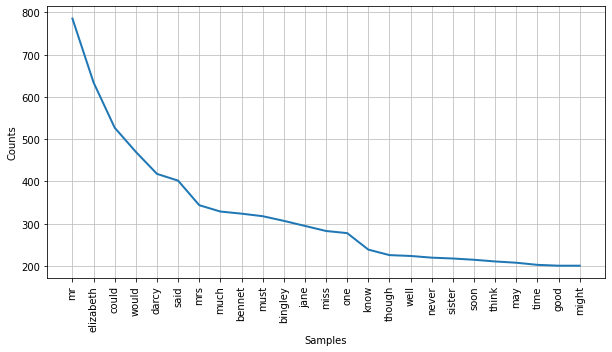

In [ ]:
from matplotlib.pyplot import figure
%matplotlib inline

# Creating the word frequency distribution
freqdist = nltk.FreqDist(words_ns)

# Plotting the word frequency distribution
figure(figsize=(10,5))
freqdist.plot(25)

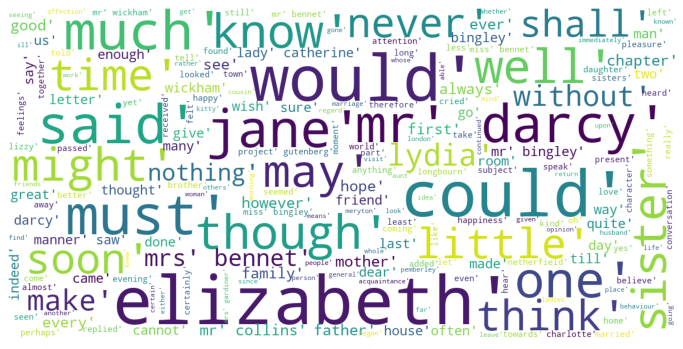

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(words_ns)


In [ ]:
%load_ext rpy2.ipython

## Wikipedia

Otra fuente de informacion puede ser recopilando datos de wikipedia. Esta libreria no es nativa de google colab, por lo que si tienen problemas para descargarla por lo que tenemos que hacerlo manualmente con la funcion `!pip`

In [ ]:
!pip install wikipedia

In [ ]:
import wikipedia as wiki

In [ ]:
wiki_info = wiki.summary('Animals')
wiki_info

'Animals (also called Metazoa) are multicellular, eukaryotic organisms in the biological kingdom Animalia. With few exceptions, animals consume organic material, breathe oxygen, are able to move, can reproduce sexually, and go through an ontogenetic stage in which their body consists of a hollow sphere of cells, the blastula, during embryonic development. Over 1.5 million living animal species have been described—of which around 1 million are insects—but it has been estimated there are over 7 million animal species in total. Animals range in length from 8.5 micrometres (0.00033 in) to 33.6 metres (110 ft). They have complex interactions with each other and their environments, forming intricate food webs. The scientific study of animals is known as zoology.\nMost living animal species are in Bilateria, a clade whose members have a bilaterally symmetric body plan. The Bilateria include the protostomes, containing invertebrates such as nematodes, arthropods, and molluscs, and the deuteros

In [ ]:
animal = wiki.page('Animals')
animal.title

'Animal'

In [ ]:
animal.content

'Animals (also called Metazoa) are multicellular, eukaryotic organisms in the biological kingdom Animalia. With few exceptions, animals consume organic material, breathe oxygen, are able to move, can reproduce sexually, and go through an ontogenetic stage in which their body consists of a hollow sphere of cells, the blastula, during embryonic development. Over 1.5 million living animal species have been described—of which around 1 million are insects—but it has been estimated there are over 7 million animal species in total. Animals range in length from 8.5 micrometres (0.00033 in) to 33.6 metres (110 ft). They have complex interactions with each other and their environments, forming intricate food webs. The scientific study of animals is known as zoology.\nMost living animal species are in Bilateria, a clade whose members have a bilaterally symmetric body plan. The Bilateria include the protostomes, containing invertebrates such as nematodes, arthropods, and molluscs, and the deuteros

In [ ]:
animal.images[:5]

['https://upload.wikimedia.org/wikipedia/commons/6/64/20090730_020239_Rotifer.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/5/5c/20191203_Anomalocaris_canadensis.png',
 'https://upload.wikimedia.org/wikipedia/commons/f/f9/A_colourful_Sponge_on_the_Fathom.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/1/1a/Alexander_Coosemans_-_Still_Life_with_Lobster_and_Oysters.jpg',
 'https://upload.wikimedia.org/wikipedia/commons/e/e1/Anax_Imperator_2%28loz%29.JPG']

In [ ]:
animal.links[:5]

['10th edition of Systema Naturae',
 'Abiogenesis',
 'Acanthocephala',
 'Acavomonadia',
 'Acidobacteriota']

In [ ]:
import nltk
import string
import re

In [ ]:
def text_lowercase(text):
    return text.lower()
animal_lowcase = text_lowercase(wiki_info)
animal_lowcase

'animals (also called metazoa) are multicellular, eukaryotic organisms in the biological kingdom animalia. with few exceptions, animals consume organic material, breathe oxygen, are able to move, can reproduce sexually, and go through an ontogenetic stage in which their body consists of a hollow sphere of cells, the blastula, during embryonic development. over 1.5 million living animal species have been described—of which around 1 million are insects—but it has been estimated there are over 7 million animal species in total. animals range in length from 8.5 micrometres (0.00033 in) to 33.6 metres (110 ft). they have complex interactions with each other and their environments, forming intricate food webs. the scientific study of animals is known as zoology.\nmost living animal species are in bilateria, a clade whose members have a bilaterally symmetric body plan. the bilateria include the protostomes, containing invertebrates such as nematodes, arthropods, and molluscs, and the deuteros

In [ ]:
# Remove numbers
def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result
 
animal_numbers = remove_numbers(animal_lowcase)
animal_numbers

'animals (also called metazoa) are multicellular, eukaryotic organisms in the biological kingdom animalia. with few exceptions, animals consume organic material, breathe oxygen, are able to move, can reproduce sexually, and go through an ontogenetic stage in which their body consists of a hollow sphere of cells, the blastula, during embryonic development. over . million living animal species have been described—of which around  million are insects—but it has been estimated there are over  million animal species in total. animals range in length from . micrometres (. in) to . metres ( ft). they have complex interactions with each other and their environments, forming intricate food webs. the scientific study of animals is known as zoology.\nmost living animal species are in bilateria, a clade whose members have a bilaterally symmetric body plan. the bilateria include the protostomes, containing invertebrates such as nematodes, arthropods, and molluscs, and the deuterostomes, containing 

In [ ]:
# remove punctuation
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)
 
animal_punct = remove_punctuation(animal_numbers)
animal_punct

'animals also called metazoa are multicellular eukaryotic organisms in the biological kingdom animalia with few exceptions animals consume organic material breathe oxygen are able to move can reproduce sexually and go through an ontogenetic stage in which their body consists of a hollow sphere of cells the blastula during embryonic development over  million living animal species have been described—of which around  million are insects—but it has been estimated there are over  million animal species in total animals range in length from  micrometres  in to  metres  ft they have complex interactions with each other and their environments forming intricate food webs the scientific study of animals is known as zoology\nmost living animal species are in bilateria a clade whose members have a bilaterally symmetric body plan the bilateria include the protostomes containing invertebrates such as nematodes arthropods and molluscs and the deuterostomes containing the echinoderms and the chordate

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
# remove stopwords function
def remove_stopwords(text):
    stop_words = set(stopwords.words("english"))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    return filtered_text
 

animal_stop = remove_stopwords(animal_punct)
animal_stop

['animals',
 'also',
 'called',
 'metazoa',
 'multicellular',
 'eukaryotic',
 'organisms',
 'biological',
 'kingdom',
 'animalia',
 'exceptions',
 'animals',
 'consume',
 'organic',
 'material',
 'breathe',
 'oxygen',
 'able',
 'move',
 'reproduce',
 'sexually',
 'go',
 'ontogenetic',
 'stage',
 'body',
 'consists',
 'hollow',
 'sphere',
 'cells',
 'blastula',
 'embryonic',
 'development',
 'million',
 'living',
 'animal',
 'species',
 'described—of',
 'around',
 'million',
 'insects—but',
 'estimated',
 'million',
 'animal',
 'species',
 'total',
 'animals',
 'range',
 'length',
 'micrometres',
 'metres',
 'ft',
 'complex',
 'interactions',
 'environments',
 'forming',
 'intricate',
 'food',
 'webs',
 'scientific',
 'study',
 'animals',
 'known',
 'zoology',
 'living',
 'animal',
 'species',
 'bilateria',
 'clade',
 'whose',
 'members',
 'bilaterally',
 'symmetric',
 'body',
 'plan',
 'bilateria',
 'include',
 'protostomes',
 'containing',
 'invertebrates',
 'nematodes',
 'arthropods'

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
stemmer = PorterStemmer()
 
# stem words in the list of tokenized words
def stem_words(text):
    word_tokens = word_tokenize(text)
    stems = [stemmer.stem(word) for word in word_tokens]
    return stems

stem_words(animal_punct)

['anim',
 'also',
 'call',
 'metazoa',
 'are',
 'multicellular',
 'eukaryot',
 'organ',
 'in',
 'the',
 'biolog',
 'kingdom',
 'animalia',
 'with',
 'few',
 'except',
 'anim',
 'consum',
 'organ',
 'materi',
 'breath',
 'oxygen',
 'are',
 'abl',
 'to',
 'move',
 'can',
 'reproduc',
 'sexual',
 'and',
 'go',
 'through',
 'an',
 'ontogenet',
 'stage',
 'in',
 'which',
 'their',
 'bodi',
 'consist',
 'of',
 'a',
 'hollow',
 'sphere',
 'of',
 'cell',
 'the',
 'blastula',
 'dure',
 'embryon',
 'develop',
 'over',
 'million',
 'live',
 'anim',
 'speci',
 'have',
 'been',
 'described—of',
 'which',
 'around',
 'million',
 'are',
 'insects—but',
 'it',
 'ha',
 'been',
 'estim',
 'there',
 'are',
 'over',
 'million',
 'anim',
 'speci',
 'in',
 'total',
 'anim',
 'rang',
 'in',
 'length',
 'from',
 'micrometr',
 'in',
 'to',
 'metr',
 'ft',
 'they',
 'have',
 'complex',
 'interact',
 'with',
 'each',
 'other',
 'and',
 'their',
 'environ',
 'form',
 'intric',
 'food',
 'web',
 'the',
 'scientif'

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer = WordNetLemmatizer()
# lemmatize string
def lemmatize_word(text):
    word_tokens = word_tokenize(text)
    # provide context i.e. part-of-speech
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens]
    return lemmas

lemmatize_word(animal_punct)

['animals',
 'also',
 'call',
 'metazoa',
 'be',
 'multicellular',
 'eukaryotic',
 'organisms',
 'in',
 'the',
 'biological',
 'kingdom',
 'animalia',
 'with',
 'few',
 'exceptions',
 'animals',
 'consume',
 'organic',
 'material',
 'breathe',
 'oxygen',
 'be',
 'able',
 'to',
 'move',
 'can',
 'reproduce',
 'sexually',
 'and',
 'go',
 'through',
 'an',
 'ontogenetic',
 'stage',
 'in',
 'which',
 'their',
 'body',
 'consist',
 'of',
 'a',
 'hollow',
 'sphere',
 'of',
 'cells',
 'the',
 'blastula',
 'during',
 'embryonic',
 'development',
 'over',
 'million',
 'live',
 'animal',
 'species',
 'have',
 'be',
 'described—of',
 'which',
 'around',
 'million',
 'be',
 'insects—but',
 'it',
 'have',
 'be',
 'estimate',
 'there',
 'be',
 'over',
 'million',
 'animal',
 'species',
 'in',
 'total',
 'animals',
 'range',
 'in',
 'length',
 'from',
 'micrometres',
 'in',
 'to',
 'metres',
 'ft',
 'they',
 'have',
 'complex',
 'interactions',
 'with',
 'each',
 'other',
 'and',
 'their',
 'environm

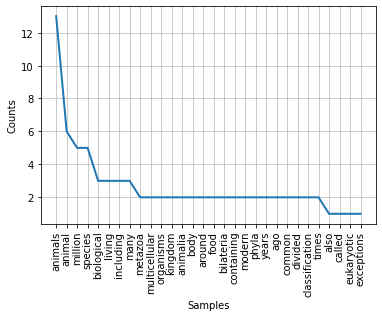

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

def graph():

    fd = nltk.FreqDist(animal_stop)
    fd.plot(30,cumulative=False)

graph()

In [ ]:
V = set(animal_stop)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

[]

Texto en tablas

In [150]:
import numpy as np 
import pandas as pd 

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk

from wordcloud import WordCloud, STOPWORDS

df = pd.read_csv('/content/drive/MyDrive/Datasets/winemag-data-130k-v2.csv')
df = df[:100]
df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [153]:
df['description'][2]

'Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.'

In [155]:
import re
description =  re.sub('[^a-zA-Z]',' ',df['description'][2])
description

'Tart and snappy  the flavors of lime flesh and rind dominate  Some green pineapple pokes through  with crisp acidity underscoring the flavors  The wine was all stainless steel fermented '

In [156]:
description = description.lower()

description

'tart and snappy  the flavors of lime flesh and rind dominate  some green pineapple pokes through  with crisp acidity underscoring the flavors  the wine was all stainless steel fermented '

In [157]:
description_words = description.split() 

description_words = [word for word in description_words if not word in stopwords.words('english')]

description_words

['tart',
 'snappy',
 'flavors',
 'lime',
 'flesh',
 'rind',
 'dominate',
 'green',
 'pineapple',
 'pokes',
 'crisp',
 'acidity',
 'underscoring',
 'flavors',
 'wine',
 'stainless',
 'steel',
 'fermented']

In [158]:
ps = PorterStemmer()
description_words=[ps.stem(word) for word in description_words]
description_words

['tart',
 'snappi',
 'flavor',
 'lime',
 'flesh',
 'rind',
 'domin',
 'green',
 'pineappl',
 'poke',
 'crisp',
 'acid',
 'underscor',
 'flavor',
 'wine',
 'stainless',
 'steel',
 'ferment']

In [159]:
df['description'][0]=' '.join(description_words)
df['description'][0]

'tart snappi flavor lime flesh rind domin green pineappl poke crisp acid underscor flavor wine stainless steel ferment'

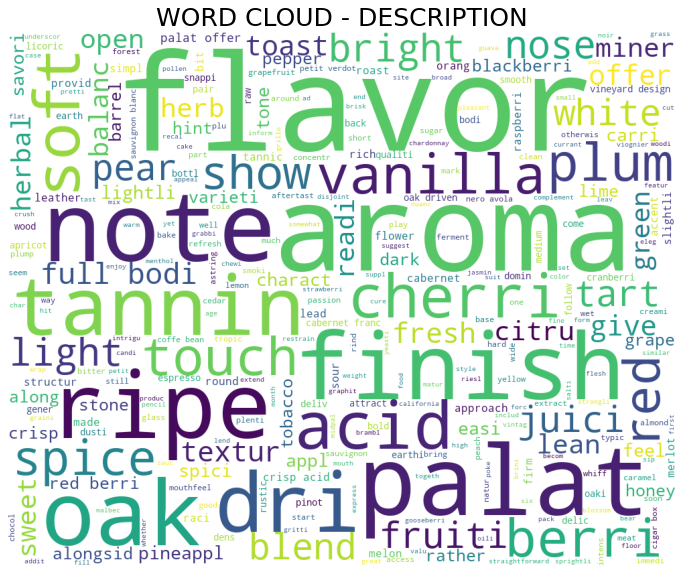

In [162]:
from wordcloud import WordCloud, STOPWORDS

stopwords = set(STOPWORDS)

newStopWords = ['fruit', "Drink", "black", 'wine', 'drink']

stopwords.update(newStopWords)

wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=300,
    max_font_size=200, 
    width=1000, height=800,
    random_state=42,
).generate(" ".join(df['description'].astype(str)))

print(wordcloud)
fig = plt.figure(figsize = (12,14))
plt.imshow(wordcloud)
plt.title("WORD CLOUD - DESCRIPTION",fontsize=25)
plt.axis('off')
plt.show()